In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [293]:
heart_disease=pd.read_csv(r"Data\heart_disease_selected_feature.csv")

In [294]:
#drop column unname0
heart_disease=heart_disease.iloc[:,1:]

In [295]:
# spilt data to feature and target
x=heart_disease.iloc[:,:-1]
y=heart_disease['num']

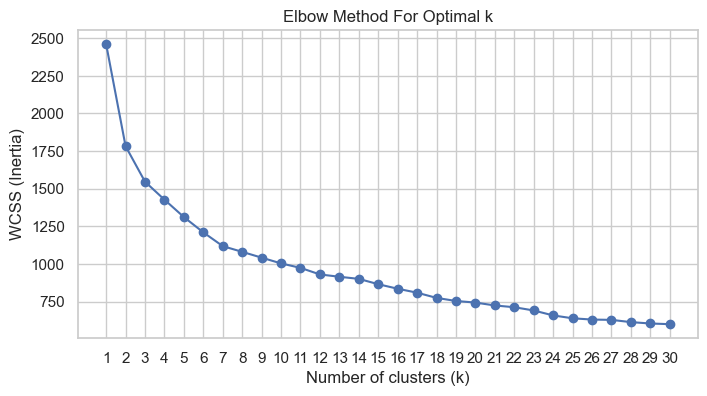

In [296]:
wcss = []
k_values = range(1, 31)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.show()

In [297]:
kmeans = KMeans(n_clusters=15, random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [298]:
print("labels\n",kmeans.labels_)
print("centers\n",kmeans.cluster_centers_)

labels
 [ 4  2  9  4 10  7 14 11  3  0  6  8 12  7 12 10  6  7  7  7  1 11  8  3
  9  4 11  8 10  9  8 12 11  6 10 10  9  2  9 12 14  6  5 12  5  3  6  2
 11  4 10  1  7 10 12  9  6  6  4  1 12  4  9 11  9  9  4  1  0  4  5  3
  9  3 10  5  9  5  7  2  6  8  7  2  7 10  7  1  5  5  1 13  3 10  5 12
  9 14  7 10  7 10  5 11  3  7 12  1  9  6  2 12  7  0  1  6  5 10  3  9
 12 14  6  0 11  8 13  9 10  7  1  6 10 12 10  8  0  1  6  4  1  8  7  9
  1  7 14 10  7  7 11  4 11  2  9 14 12  3  3  1  6  3  4  4  7 12  7 11
 12 10  2  2 12 11  2  2  3  2  7  3  6 14  7  4  5  5  6  2  5 14 10  9
 12 14  8  3  8 12  7  8  7  5 12 11  6  3  9  2  7 12 10  6  4 13  7  4
 10 12 14  5  7  7 10  9  3 10 10  5  1  1  8 13  3  1  5  9  0  1  8  7
 10  7  7  4 12  1  3  9  3 11  9  9  9  7  6 10  3  8  5  1  7 11  8 10
  2  9 12  9 10 10  2  2  9  4  7  8  5 10  5  4  9 10  2 10 12 14 13  1
  1  4  1 11  6  2 12 10  2 12  6 14  9  8 10]
centers
 [[ 1.35510297  0.60609143 -0.30413638 -0.40494855  3.0812405

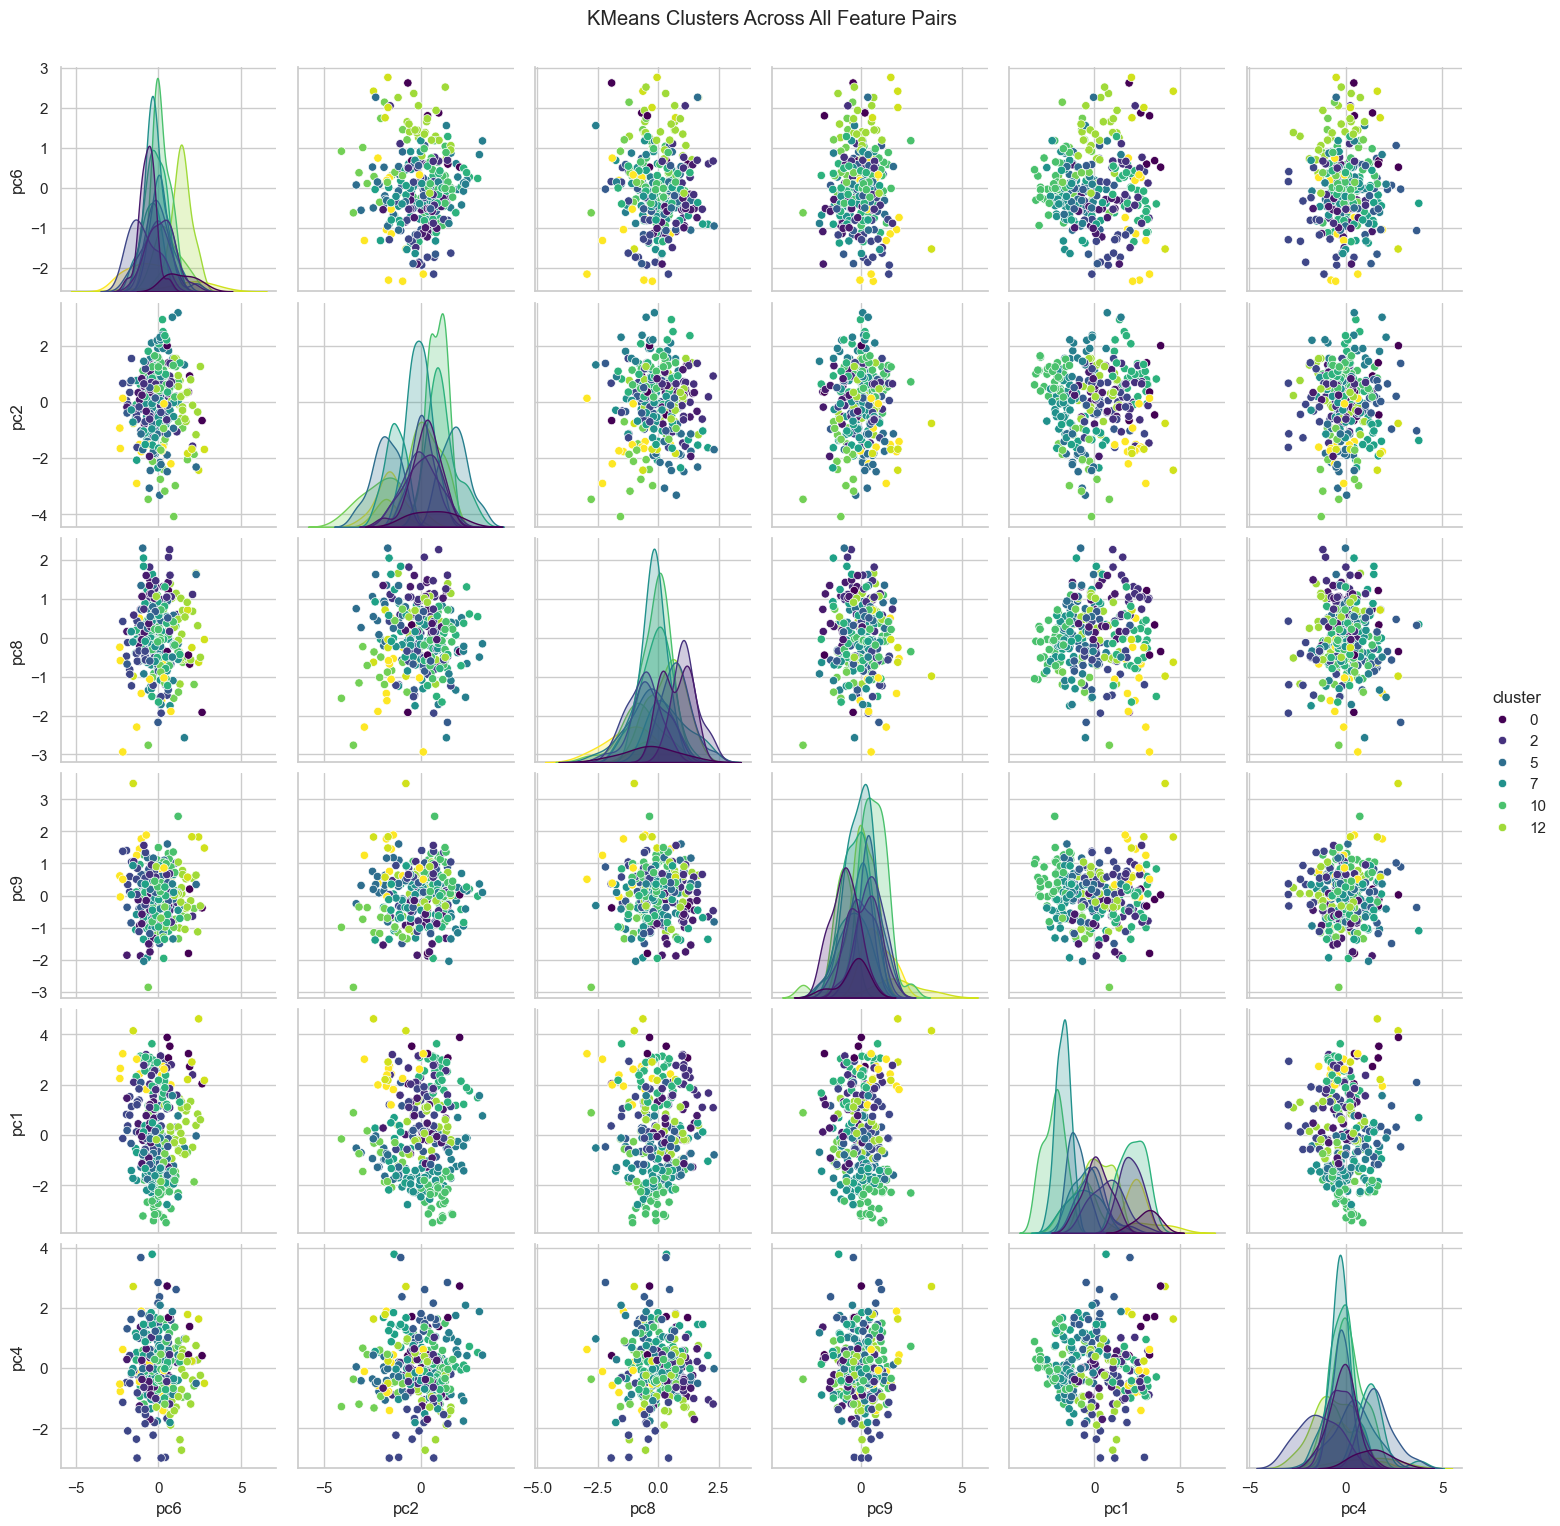

In [299]:
clustered_df = pd.concat([x, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# ✅ رسم pairplot
sns.pairplot(clustered_df, vars=x.columns, hue='cluster', palette='viridis')
plt.suptitle("KMeans Clusters Across All Feature Pairs", y=1.02)
plt.show()

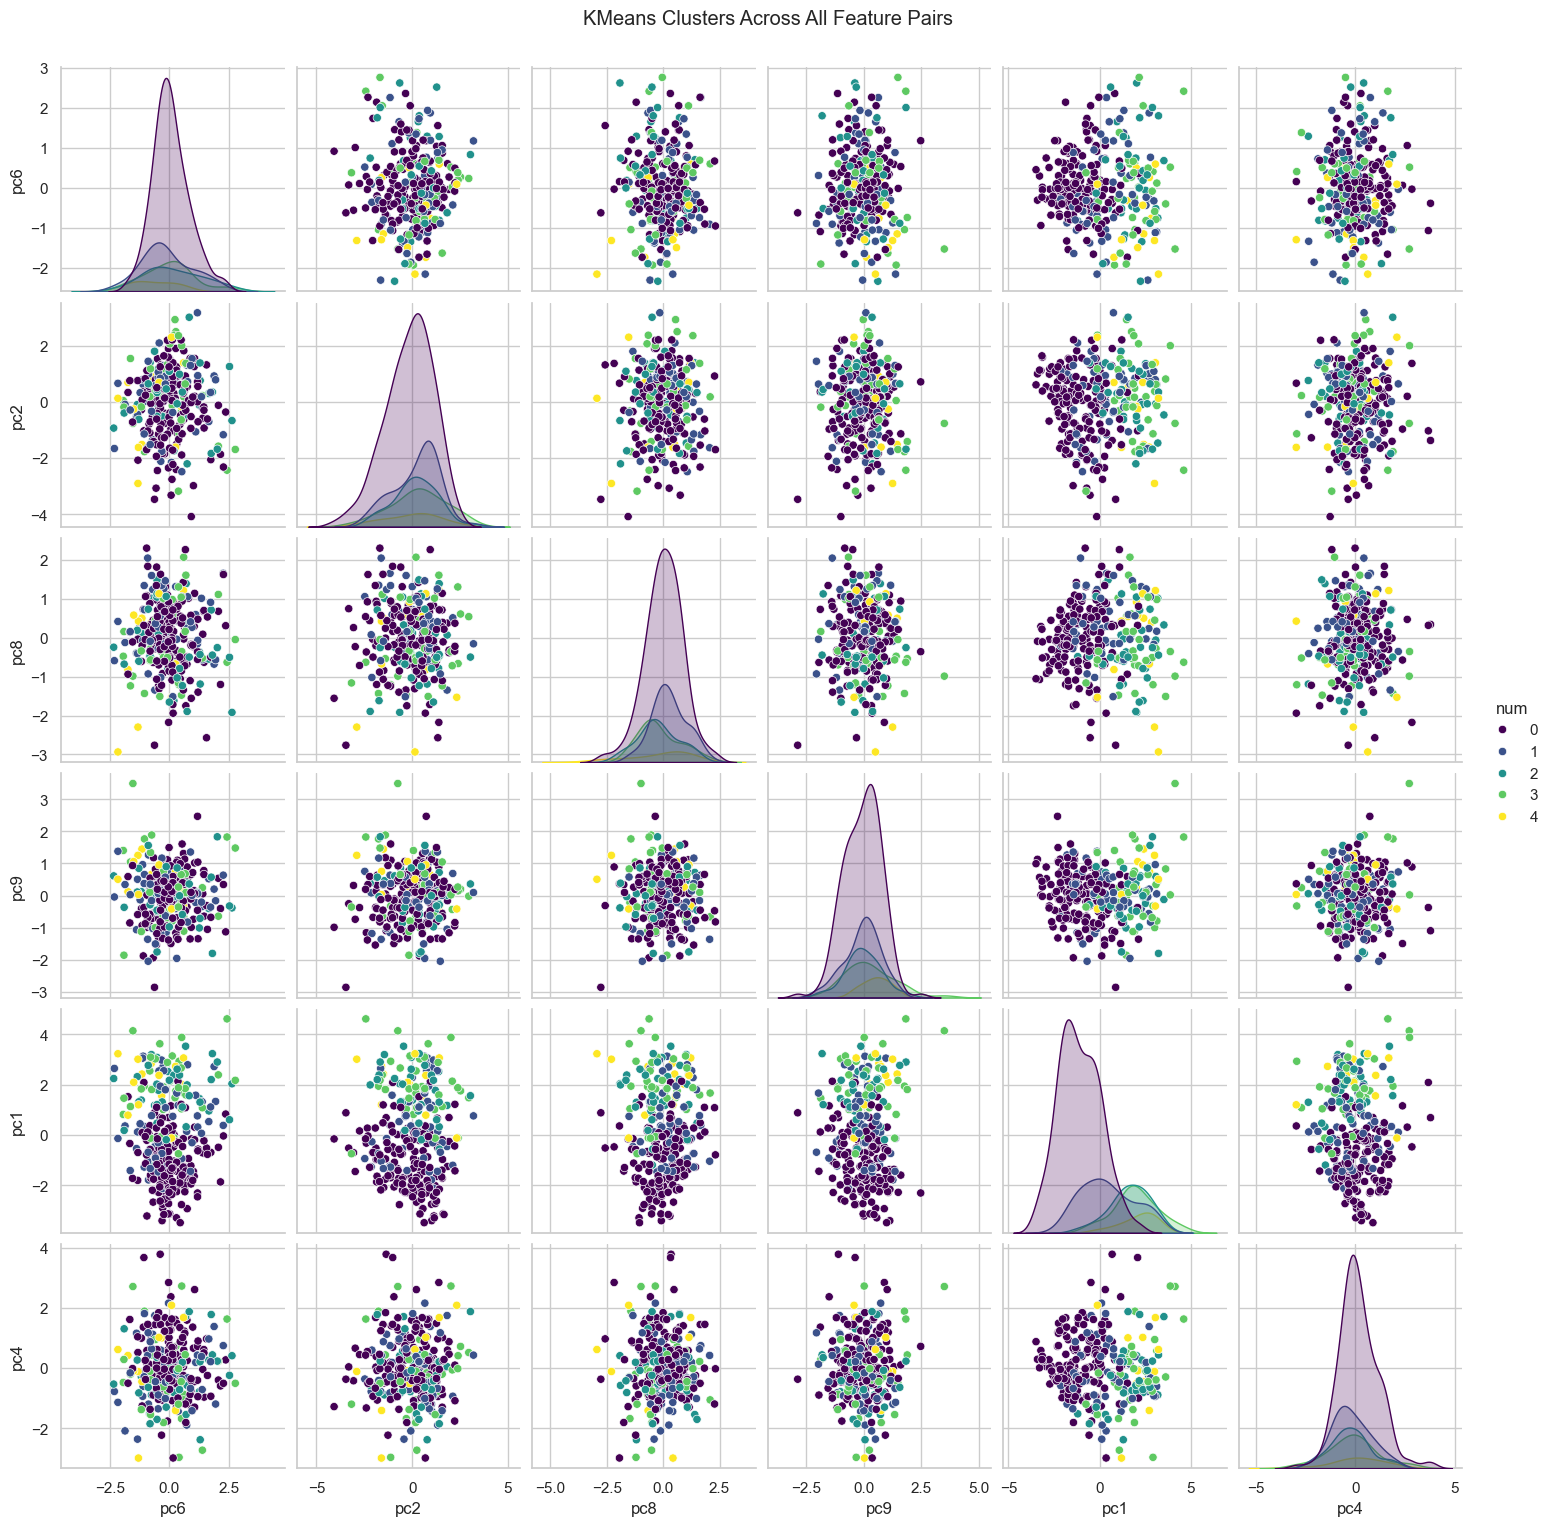

In [300]:


# ✅ رسم pairplot
sns.pairplot(heart_disease, vars=x.columns, hue='num', palette='viridis')
plt.suptitle("KMeans Clusters Across All Feature Pairs", y=1.02)
plt.show()

In [301]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.DataFrame({'cluster': kmeans.labels_, 'label': y})

# 1. Majority label for each cluster
cluster_to_label = df.groupby('cluster')['label'].agg(lambda x: x.value_counts().index[0]).to_dict()

# 2. Map cluster to predicted label
predicted_labels = df['cluster'].map(cluster_to_label)

# 3. Evaluate
acc = accuracy_score(df['label'], predicted_labels)
cm = confusion_matrix(df['label'], predicted_labels)

print("✅ Accuracy after mapping clusters:", acc)
print("✅ Confusion Matrix:\n", cm)


✅ Accuracy after mapping clusters: 0.6237623762376238
✅ Confusion Matrix:
 [[146   9   0   8   1]
 [ 26  10   1  17   1]
 [  6   6   3  17   4]
 [  5   1   1  26   2]
 [  1   0   1   7   4]]


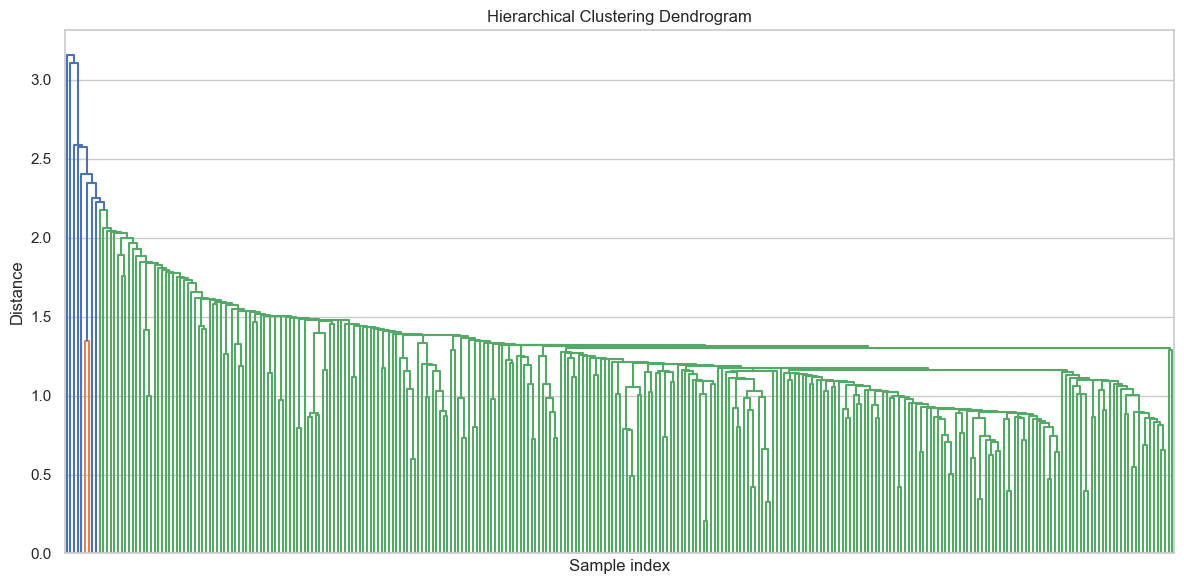

In [302]:
from scipy.cluster.hierarchy import linkage, dendrogram



linked = linkage(x, method='single')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.xticks([])
plt.tight_layout()
plt.show()


In [309]:
from scipy.cluster.hierarchy import fcluster


hc_cluster= fcluster(linked, t=35, criterion='maxclust')



In [311]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
# Step 5: Map clusters to most frequent labels
temp_df = pd.DataFrame({'hc_cluster': hc_cluster, 'num': y})
mapping = temp_df.groupby('hc_cluster')['num'].agg(lambda x: x.mode().iloc[0]).to_dict()
predicted_labels = pd.Series(hc_cluster).map(mapping)

# ✅ Step 6: Create new DataFrame
df_clustered = x
df_clustered['num'] = y.values
df_clustered['hc_cluster'] = hc_cluster
df_clustered['predicted_label'] = predicted_labels.values

# Preview
df_clustered.head()

,pc6,pc2,pc8,pc9,pc1,pc4,num,hc_cluster,predicted_label
0,0.068411,-0.956498,-0.567989,-1.500963,1.161774,2.369109,0,4,0
1,-0.748825,-1.453764,1.021881,0.461065,3.200497,-0.888229,2,7,0
2,-1.094803,0.634513,0.173919,0.051824,3.136763,-0.604880,1,7,0
3,-0.026806,1.389207,-2.173633,0.892354,-0.470044,2.843081,0,22,0
4,-0.213986,-0.383744,0.046280,1.064034,-2.279710,1.186031,0,7,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score

# True and predicted labels
y_true = df_clustered['num']
y_pred = df_clustered['predicted_label']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

# Print results
print("✅ Accuracy:", acc)
print("✅ Confusion Matrix:\n", cm)



✅ Accuracy: 0.6171617161716172
✅ Confusion Matrix:
 [[164   0   0   0   0]
 [ 54   1   0   0   0]
 [ 28   0   8   0   0]
 [ 24   0   1  10   0]
 [  8   0   1   0   4]]
